The goal of this exercise is to get you familiar with random forests, which are a powerful variation on decision trees and advanced feature selection techniques.
We are going to continue to use the RMS Titanic dataset in this exercise as well.

In [1]:
# imports and constants
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 30
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import random

# Data Preprocessing

We are going to continue to use the RMS Titanic dataset in this exercise as well.

In [2]:
data = pd.read_csv('titanic.csv', index_col=0)
data = pd.get_dummies(data)

X = data.drop('Survived', axis=1)
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=200)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (691, 27)
y_train shape:  (691,)
X_test shape:  (200, 27)
y_test shape:  (200,)


# Random Forest
#### A: Training Random Forest
1. Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and understand how to train random forest.
2. Train 20 models with varying n_estimators between 1 and 500 (make sure to include both 1 and 500).
<br>In addition, use the max_depth value that worked best for your decision tree from the previous exercise and random_state=0. Also save the model with the best test accuracy in "best_random_forest".

In [3]:
train_acc = []
test_acc = []

n_estimators_values = []

best_random_forest = None

##### YOUR CODE STARTS HERE #####
n_estimators_values += [1]+[500]

#after including 1 and 500 
for j in range(18):
    #varying n_estimators
    n_estimators_values += [random.randint(1,499)]

for i in n_estimators_values: 
    clf = RandomForestClassifier(n_estimators = i, random_state = 0, max_depth = 2)
    clf.fit(X_train, y_train)
    
    train_acc += [clf.score(X_train, y_train)]
    test_acc += [clf.score(X_test, y_test)]
#We choose the best random forest value:     
best_value = max(test_acc)
best_value_at_i = test_acc.index(best_value)
best_n_estimator = n_estimators_values[best_value_at_i]
best_random_forest = RandomForestClassifier(n_estimators = best_n_estimator, random_state = 0, max_depth = 3).fit(X_train, y_train)

print(list(zip(n_estimators_values, test_acc)))

##### YOUR CODE ENDS HERE #####

[(1, 0.79), (500, 0.795), (257, 0.795), (161, 0.795), (346, 0.795), (340, 0.795), (238, 0.795), (28, 0.795), (83, 0.795), (141, 0.795), (312, 0.795), (131, 0.795), (116, 0.795), (253, 0.795), (262, 0.795), (342, 0.795), (37, 0.795), (156, 0.795), (324, 0.795), (209, 0.795)]


In [4]:
clf.score(X_test, y_test)

0.795

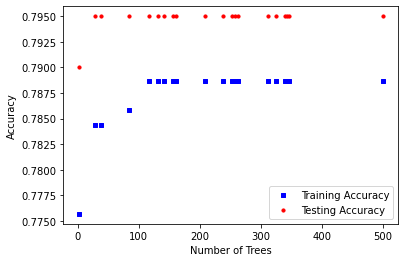

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(n_estimators_values, train_acc, s=10, c='b', marker="s", label='Training Accuracy')
ax1.scatter(n_estimators_values ,test_acc, s=10, c='r', marker="o", label='Testing Accuracy')
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Number of Trees")
plt.legend(loc='lower right')
plt.show()

#### B: Explain the results

1. Is there a trend in the training accuracy with respect to the number of trees in the forest? If so, why? <br>
2. Is there a trend in the test accuracy with respect to the number of trees in the forest? If so, why? <br>
3. What number of trees in the forest do you recommend? Why? Does it outperform the decision tree? <br>

1. Yes, Notice that the more the number of trees in the forest is the more the training accuracy increases, until it reaches a certain point that the accuracy becomes constant (around 200) <br> 

2. Yes, The higher the number of trees in the forest is the more the testing accuracy is, until it reaches a certain point where the accuracy becomes constant (around 400) <br> 

3. 450 trees in the forest would produce the highest accuracy and outperform the decision tree. 

#### C: When You used n_estimators=1, did you get the same train and test accuracies using this value as when running the single decision tree in the previous exercise with the same max_depth? Why?

Yes, because when n_estimators = 1, as if we are using a single decision tree.

# Part 2 - Feature Selection

#### Run the code below to create a confusion matrix for your best random forest model.

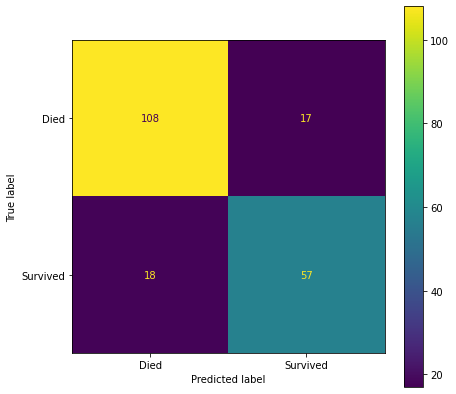

In [6]:
plot_confusion_matrix(best_random_forest, X_test, y_test, values_format = '', display_labels=['Died', 'Survived'])
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

#### A: Now write a function that computes the confusion matrix yourself and compare your results with the plotted confusion matrix

In [7]:
def build_conf_matrix(y_true, y_pred):
    y_true = np.array(y_true)
    conf_dict = {"TP": 0, "FP": 0, "TN": 0, "FN": 0}
    ##### YOUR CODE STARTS HERE ~ 10 lines #####
    for i in range(len(y_pred)):
        if y_pred[i] == 1:
            if y_true[i] == 1:
                conf_dict["TP"] += 1
            else:
                conf_dict["FP"] += 1
                
        if y_pred[i] == 0:
            if y_true[i] == 0:
                conf_dict["TN"] += 1
            else:
                conf_dict["FN"] += 1
    #####  YOUR CODE ENDS HERE  #####
    return conf_dict

y_pred = best_random_forest.predict(X_test)
conf_mat = build_conf_matrix(y_test, y_pred)
print(f'TP: {conf_mat["TP"]}')
print(f'FP: {conf_mat["FP"]}')
print(f'TN: {conf_mat["TN"]}')
print(f'FN: {conf_mat["FN"]}')

TP: 57
FP: 17
TN: 108
FN: 18


#### B: Read about [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) and [F1-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html). Implement them and compare them to the results of the sklearn implementations using the written assertion tests, to help you we already started you out with a call to the confusion matrix function that you wrote!
####

In [8]:
##### YOUR CODE STARTS HERE ~ 1-3 lines for each function #####
def my_accuracy(y_true, y_pred):
    conf_mat = build_conf_matrix(y_true, y_pred)
    acc = ((conf_mat["TN"] + conf_mat["TP"]) / len(y_true))
    return acc
    
def my_precision(y_true, y_pred):
    conf_mat = build_conf_matrix(y_true, y_pred)
    precision = conf_mat["TP"] / (conf_mat["FP"] + conf_mat["TP"])
    return precision

def my_recall(y_true, y_pred):
    conf_mat = build_conf_matrix(y_true, y_pred)
    recall = conf_mat["TP"] / (conf_mat["TP"] + conf_mat["FN"])
    return recall

def my_f1(y_true, y_pred):
    conf_mat = build_conf_matrix(y_true, y_pred)
    f1_score = (2 * (my_precision(y_true, y_pred) * my_recall(y_true, y_pred))) / (my_precision(y_true, y_pred) + my_recall(y_true, y_pred))
    return f1_score

#####  YOUR CODE ENDS HERE  #####

In [9]:
#####  TESTS  #####
y_pred = best_random_forest.predict(X_test)
assert accuracy_score(y_test, y_pred) == my_accuracy(y_test, y_pred)
assert recall_score(y_test, y_pred) == my_recall(y_test, y_pred)
assert precision_score(y_test, y_pred) == my_precision(y_test, y_pred)
assert f1_score(y_test, y_pred) == my_f1(y_test, y_pred)

#### B: Perform forward selection. Train the model using a single feature at a time, and choose the best feature using the testing dataset using your chosen metric. Next, check which feature performs best when added to the feature you previously chose. Repeat this process until you reach all features. Finally, visualize the training and testing cost as a function of the number of features. What do you learn from the plot?

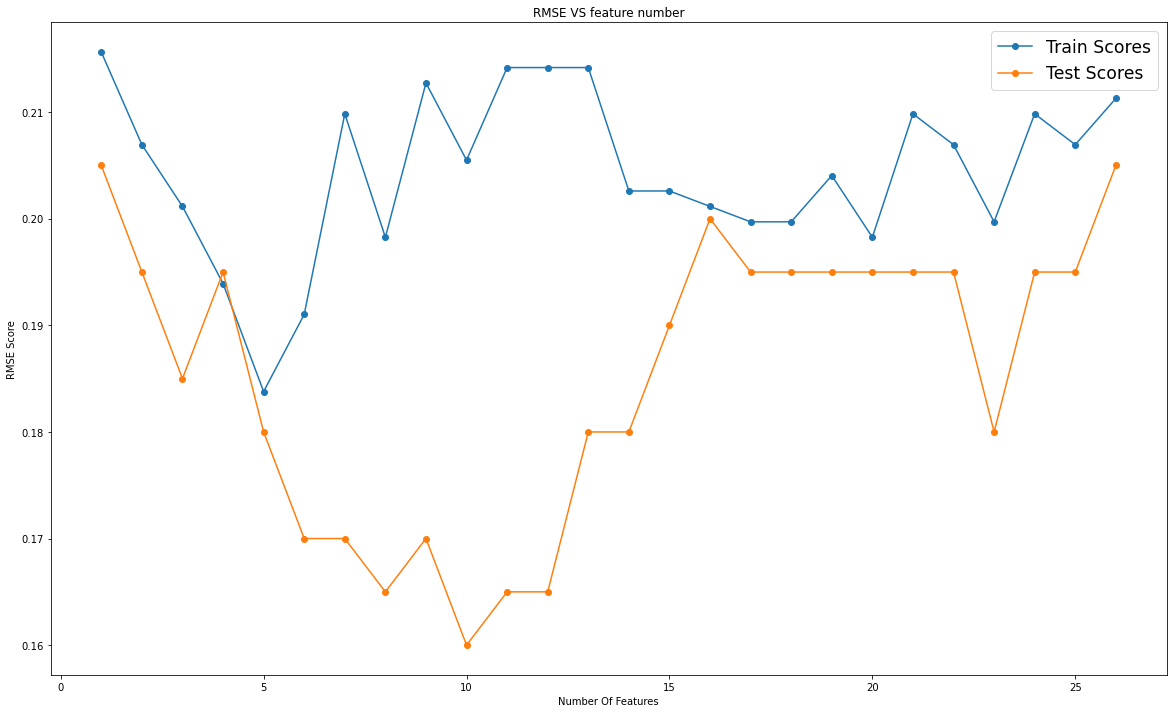

In [17]:
feature_list = list(data.columns[:-1])
feature_selection = []
scores_train = []
scores_test = []

### hint -> use the following 2 loops in your code
### the outer loop will loop over the feature list until we choose all of them
### the second loop will go over the current features in the feature list
### in each stage in the inner loop save the best feature and its score and replace it only if we find a better one
### you can use ${some list}.remove(feature) to remove a feature from the list if you needed (you can add it back with append)

#####  YOUR CODE ENDS HERE  #####
feature_list.remove('Survived')


#(outer_loop)
while feature_list:
    choose_features = feature_selection.copy()
    best_feature = None
    best_test_score = float('inf')
    
    #We start the choosing process of the feature_list(inner_loop)
    for feature in feature_list:
        choose_features += [feature]
        
        #We train the model
        classifier = RandomForestClassifier(n_estimators=500, random_state=0, max_depth=2)
        classifier.fit(X_train[choose_features],y_train)
        
        #We start calculating the mean squared error for test data
        current_test_score = mean_squared_error(y_test,classifier.predict(X_test[choose_features])) 
        
        
        if(current_test_score < best_test_score):
            best_test_score = current_test_score
            
        #We start calculating the mean squared error for test data
            current_train_score = mean_squared_error(y_train, classifier.predict(X_train[choose_features])) 
            best_feature = feature
            
        choose_features.remove(feature)
    
    #Updating scores: 
    scores_train += [current_train_score]
    scores_test += [best_test_score]
    
    
    #We append the feature list, updated:
    feature_selection += [best_feature]
    feature_list.remove(best_feature)
      
##### your code ends here #####

fig, ax = plt.subplots(1, figsize=(20,12))
ax.plot([i for i in range(1, len(scores_train) + 1)], scores_train, marker='o', label='Train Scores')
ax.plot([i for i in range(1, len(scores_test) + 1)], scores_test, marker='o', label='Test Scores')
ax.set_xlabel("Number Of Features")
ax.set_ylabel('RMSE Score')
ax.title.set_text("RMSE VS feature number")
ax.legend(fontsize='xx-large')
plt.show()

In [18]:
print(feature_selection)

['Sex_female', 'Age', 'Pclass', 'SibSp', 'Parch', 'Title_Army.', 'Title_Mrs.', 'Title_Master.', 'Fare', 'Embarked_S', 'Embarked_C', 'Title_Rev.', 'Title_Dr.', 'Title_Miss.', 'Embarked_Q', 'Title_Mr.', 'Cabin_cat_B', 'Title_Noble.', 'Cabin_cat_A', 'Cabin_cat_C', 'Cabin_cat_None', 'Cabin_cat_D', 'Cabin_cat_E', 'Cabin_cat_F', 'Cabin_cat_G', 'Sex_male']


Test Score: <br>
As shown above, as we the number of features increases, the RMSE test score decreases until we reach a certain point(around 22) of features, then the RMSE test score increase as the number of features increases. <br> <br>
Training Score: <br>
As shown above, as we the number of features increases, the RMSE train score decreases until we reach a certain point(around 11) of features, then the RMSE train score remains stable with few changes to it as the number of features increases. <br>

In conclusion, when the number of features increases, our erorr will decrease, however we will reach a point where the erorr will start increasing which might be because of overfitting. 

## Please Check that you answered all the questions before you submit and Good Luck!